In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips_data=pd.read_csv("/media/tip.csv")

# ***1. Dataset Overview***

In [4]:
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
print(tips_data.isnull().sum())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [7]:
print(tips_data.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [8]:
print(tips_data.shape)

(244, 7)


In [9]:
print(tips_data.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


# ***2. Univariate Analysis***

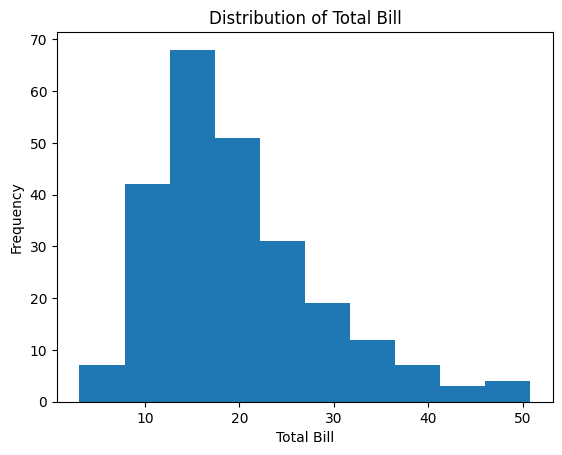

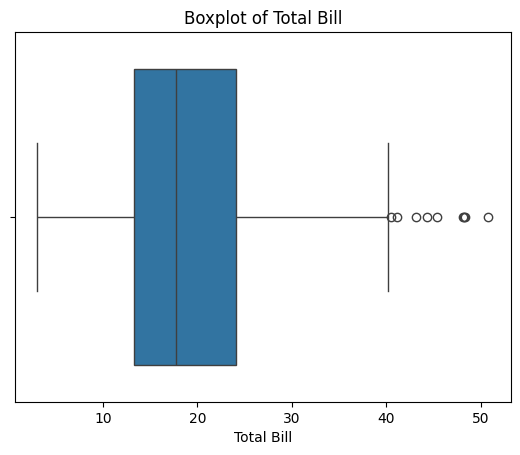

In [11]:
plt.hist(tips_data['total_bill'])
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Distribution of Total Bill')
plt.show()

sns.boxplot(x=tips_data['total_bill'])
plt.xlabel('Total Bill')
plt.title('Boxplot of Total Bill')
plt.show()

In [12]:
print(tips_data['day'].mode()[0])

Sat


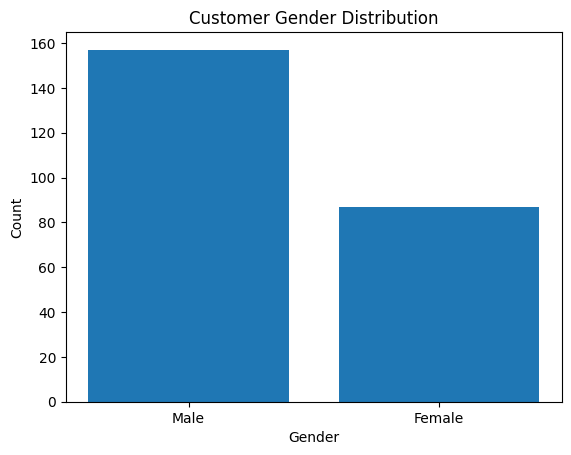

In [13]:
gender_counts = tips_data['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer Gender Distribution')
plt.show()

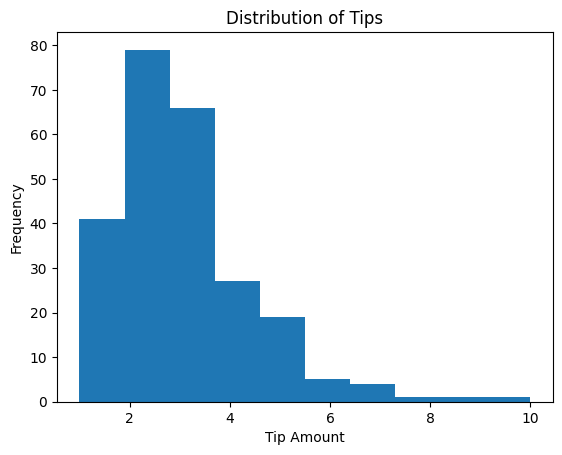

Average tip amount: 2.99827868852459


In [14]:
plt.hist(tips_data['tip'])
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Tips')
plt.show()
print(f"Average tip amount: {tips_data['tip'].mean()}")

# ***3. Bivariate Analysis***

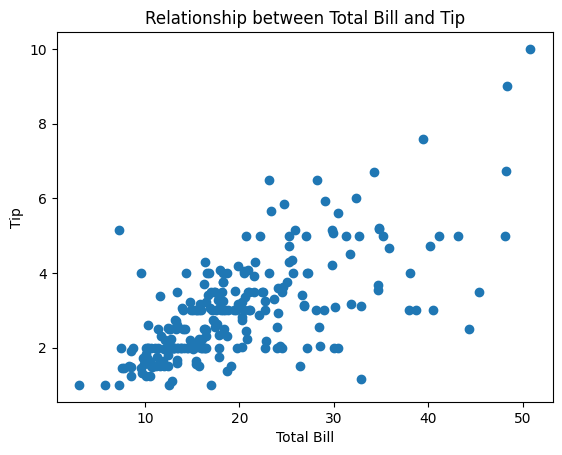

In [15]:
plt.scatter(tips_data['total_bill'], tips_data['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relationship between Total Bill and Tip')
plt.show()

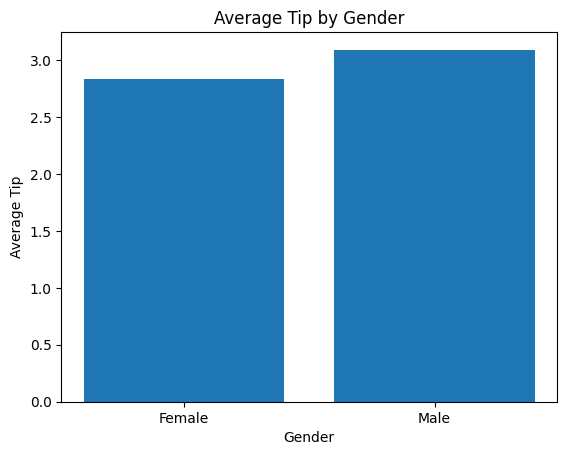

In [16]:
avg_tip_by_gender = tips_data.groupby('sex')['tip'].mean()
plt.bar(avg_tip_by_gender.index, avg_tip_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Average Tip')
plt.title('Average Tip by Gender')
plt.show()

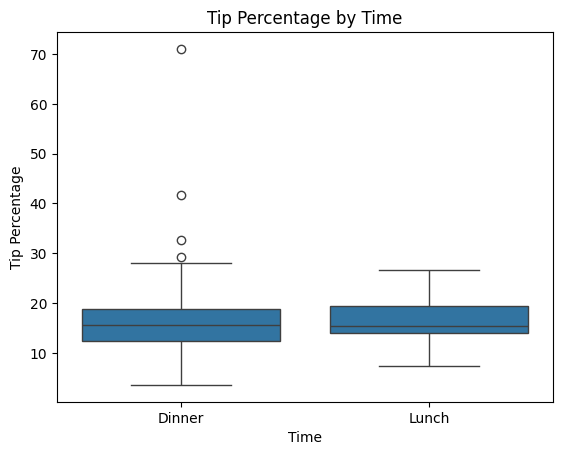

In [18]:
tips_data['tip_percentage'] = (tips_data['tip'] / tips_data['total_bill']) * 100
sns.boxplot(x='time', y='tip_percentage', data=tips_data)
plt.xlabel('Time')
plt.ylabel('Tip Percentage')
plt.title('Tip Percentage by Time')
plt.show()

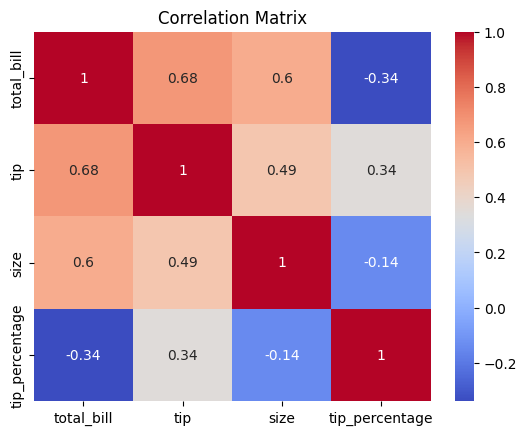

In [37]:
numeric_data = tips_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ***4. Grouped Analysis***

In [20]:
avg_by_day = tips_data.groupby('day')[['total_bill', 'tip']].mean()
print(avg_by_day)

      total_bill       tip
day                       
Fri    17.151579  2.734737
Sat    20.441379  2.993103
Sun    21.410000  3.255132
Thur   17.682742  2.771452


In [22]:
avg_tip_percentage_by_day = tips_data.groupby('day')['tip_percentage'].mean()
day_with_highest_tip_percentage = avg_tip_percentage_by_day.idxmax()
print(f"Day with highest average tip percentage: {day_with_highest_tip_percentage}")

Day with highest average tip percentage: Fri


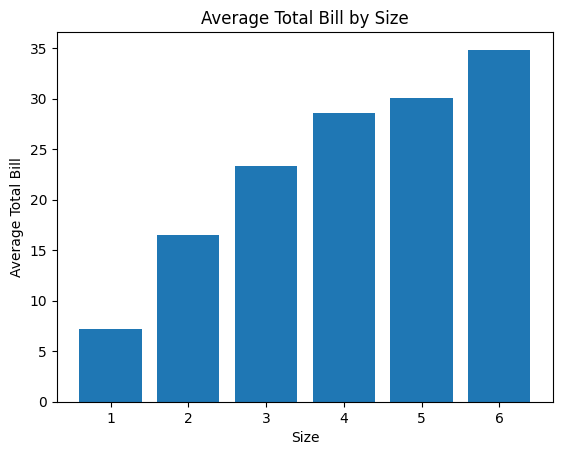

In [24]:
avg_total_bill_by_size = tips_data.groupby('size')['total_bill'].mean()
plt.bar(avg_total_bill_by_size.index, avg_total_bill_by_size.values)
plt.xlabel('Size')
plt.ylabel('Average Total Bill')
plt.title('Average Total Bill by Size')
plt.show()

In [28]:
tips_data['tip_percentage'] = (tips_data['tip'] / tips_data['total_bill']) * 100


In [29]:
print(tips_data.head())

   total_bill   tip     sex smoker  day    time  size  tip_percentage
0       16.99  1.01  Female     No  Sun  Dinner     2        5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3       16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3       16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2       13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4       14.680765


In [31]:
avg_tip_percentage_by_time = tips_data.groupby('time')['tip_percentage'].mean()
time_with_highest_tip_percentage = avg_tip_percentage_by_time.idxmax()
print(f"Time with highest average tip percentage: {time_with_highest_tip_percentage}")

Time with highest average tip percentage: Lunch


In [32]:
avg_tip_by_smoker = tips_data.groupby('smoker')['tip'].mean()
print(avg_tip_by_smoker)

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


# ***6. Visualization Challenge***

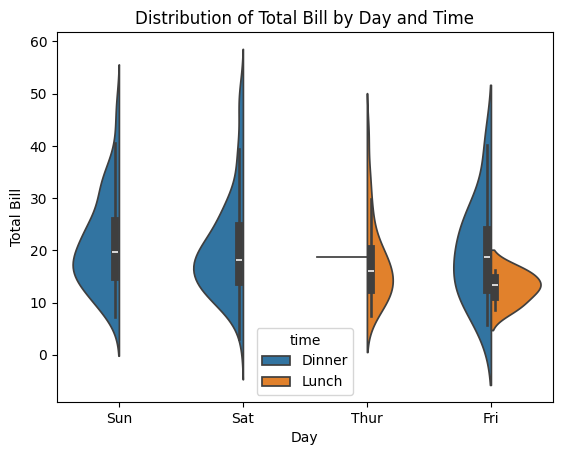

In [34]:
sns.violinplot(x="day", y="total_bill", hue="time", data=tips_data, split=True)
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Distribution of Total Bill by Day and Time")
plt.show()

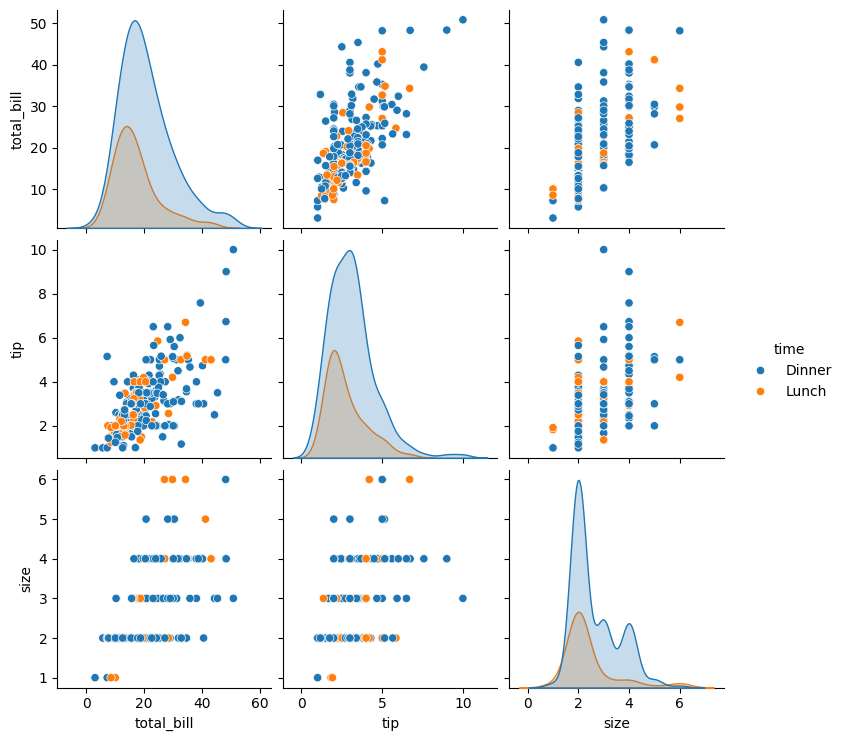

In [35]:
sns.pairplot(tips_data, vars=["total_bill", "tip", "size"], hue="time")
plt.show()

***Insights from the pair plot:***

**Total Bill and Tip:** There is a positive correlation between total bill and tip amount, indicating that higher bills generally lead to higher tips

**Size and Total Bill:** There is a positive correlation between the size of the party and the total bill, meaning larger groups tend to have higher bills

**Size and Tip:** There is a slight positive correlation between party size and tip amount, although it's not as strong as the total bill relationship

**Time and Total Bill/Tip:** You might observe some differences in distributions and relationships based on the time of day (lunch or dinner), which the 'hue' parameter helps visualize